# Predicting Sales Price of Old car using Regression

The prices of new cars in the industry are fixed by the manufacturer with some additional costs incurred by the Government in the form of taxes. So, customers buying a new car can be assured of the money they invest to be worthy. But due to the increased price of new cars and the incapability of customers to buy new cars due to the lack of funds, used cars sales are on a globally increase. As per the reports from Auto Car India, in FY2022, the no of old car users has been increased in massive rate.
There is a need for a used car price prediction system to effectively determine the worthiness of the car using a variety of features.


In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("cardekho.csv")

In [3]:
df

,Car_Name,Year,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [4]:
df.shape

(4340, 8)

In [5]:
print(df['Fuel_Type'].unique())
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
['Individual' 'Dealer' 'Trustmark Dealer']
['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


In [6]:
#check missing and null values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

No null values are there.

In [7]:
df.describe()

,Year,Selling_Price,Kms_Driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.096774,5.043381e+05,66195.040092
std,4.215757,5.785445e+05,46649.084846
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.100000e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2022.000000,8.900000e+06,806599.000000


In [8]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [9]:
final_dataset=df[['Year', 'Selling_Price','Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [10]:
final_dataset.head()

,Year,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [11]:
#Make a new feature 'Current_year'
final_dataset['Current_Year']=2022

In [12]:
final_dataset.head()

,Year,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,2022
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,2022
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,2022
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,2022
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,2022


In [13]:
#For calculating age of car
final_dataset['No_Year']=final_dataset['Current_Year']-final_dataset['Year']

In [14]:
final_dataset.head()

,Year,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,No_Year
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,2022,15
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,2022,15
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,2022,10
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,2022,5
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,2022,8


In [15]:
#delete Year Column
final_dataset.drop(['Year'],axis=1,inplace=True)

In [16]:
#delete Current_Year Column
final_dataset.drop(['Current_Year'],axis=1,inplace=True)

In [17]:
final_dataset.head()

,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_Year
0,60000,70000,Petrol,Individual,Manual,First Owner,15
1,135000,50000,Petrol,Individual,Manual,First Owner,15
2,600000,100000,Diesel,Individual,Manual,First Owner,10
3,250000,46000,Petrol,Individual,Manual,First Owner,5
4,450000,141000,Diesel,Individual,Manual,Second Owner,8


In [18]:
corr=final_dataset.corr()

In [19]:
corr

,Selling_Price,Kms_Driven,No_Year
Selling_Price,1.000000,-0.192348,-0.413963
Kms_Driven,-0.192348,1.000000,0.419624
No_Year,-0.413963,0.419624,1.000000


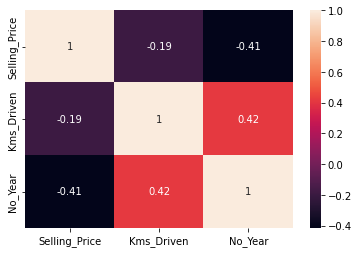

In [20]:
import seaborn as sns
sns.heatmap(final_dataset.corr(),annot=True)

No features are highly correlated with each other.

# Making Box Plot of the numeric attributes to check if there is any outliers

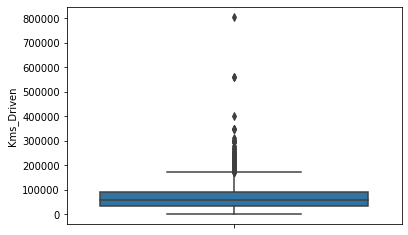

In [21]:
sns.boxplot(y='Kms_Driven', data=final_dataset)

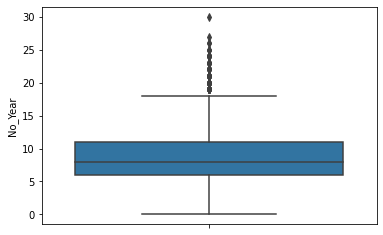

In [22]:
sns.boxplot(y='No_Year', data=final_dataset)

# EDA

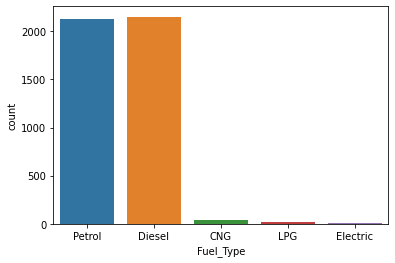

In [23]:
sns.countplot(x='Fuel_Type', data=final_dataset)

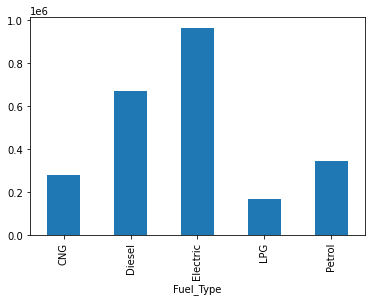

In [24]:
import matplotlib.pyplot as plt
plt.figure()
final_dataset.groupby('Fuel_Type')['Selling_Price'].mean().plot(kind='bar')

Highest selling count is on petrol cars, diesel cars and lowest selling count on electric vehicles.But average selling price is highest on diesel cars and lowest on LPG variant. For petrol,electric and cng cars avg selling price is quite same.

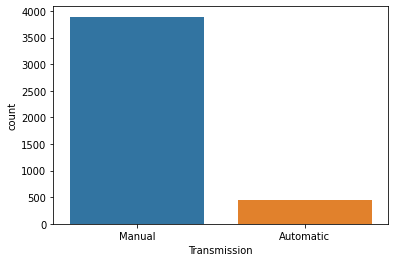

In [25]:
sns.countplot(x='Transmission', data=final_dataset)

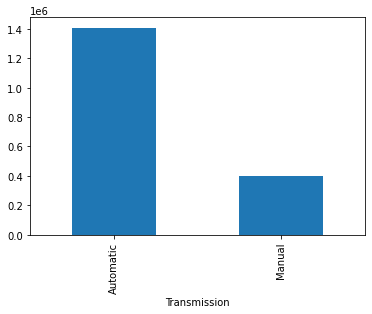

In [26]:
plt.figure()
final_dataset.groupby('Transmission')['Selling_Price'].mean().plot(kind='bar')

Manual transmission cars more come for 2nd hand sale than automatic transmission cars but average selling price is more on automatic transmission cars than manual transmission cars.

#Histogram

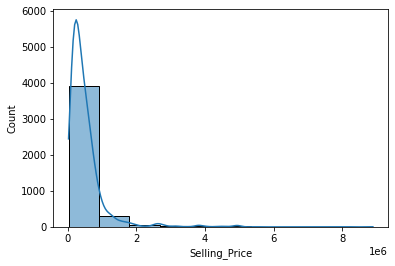

In [27]:
sns.histplot(x='Selling_Price',data=final_dataset,bins=10,kde=True)

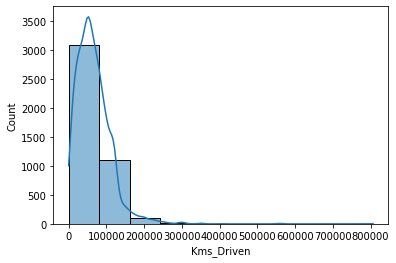

In [28]:
sns.histplot(x='Kms_Driven',data=final_dataset,bins=10,kde=True)

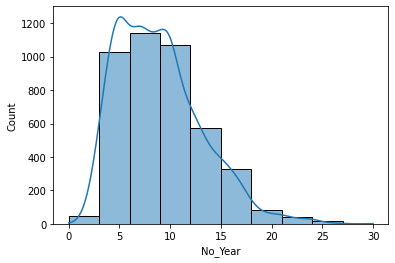

In [29]:
sns.histplot(x='No_Year',data=final_dataset,bins=10,kde=True)

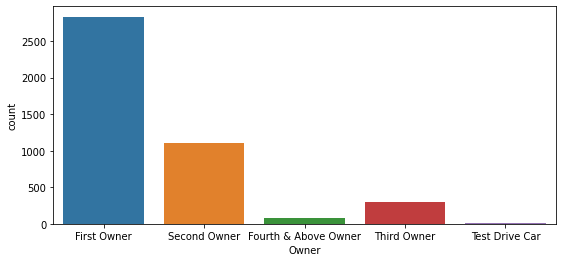

In [30]:
plt.figure(figsize=(9,4))
sns.countplot(x='Owner', data=final_dataset)

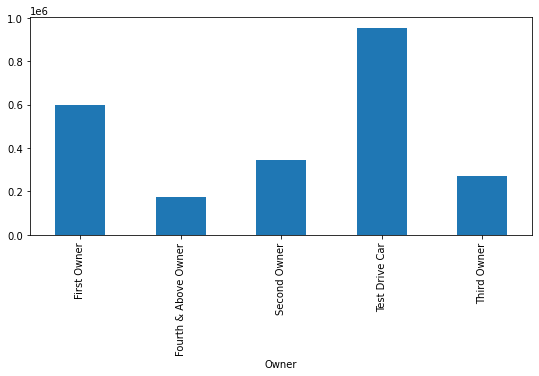

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(9,4))
final_dataset.groupby('Owner')['Selling_Price'].mean().plot(kind='bar')

Highest no of cars are 1st owner cars then 2nd and 3 rd owner cars and lowest count of test drive cars. But average selling price is highest for test drive car. As no of ownership for a car increase, price will decrease. 

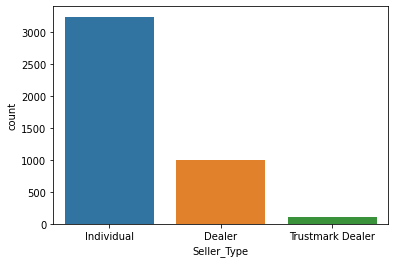

In [32]:
sns.countplot(x='Seller_Type', data=final_dataset)

As per data most of the seller choice to sell their cars individually  inspite of selling through dealer.

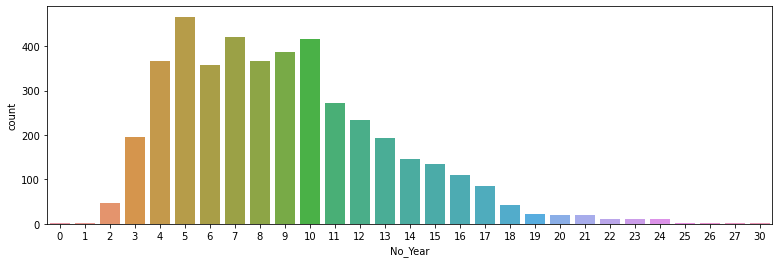

In [33]:
plt.figure(figsize=(13,4))
sns.countplot(x='No_Year', data=final_dataset)

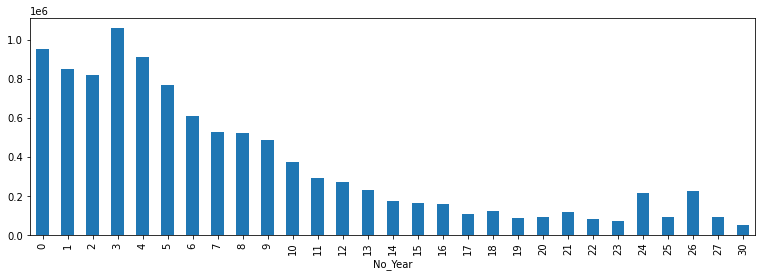

In [34]:
plt.figure(figsize=(13,4))
final_dataset.groupby('No_Year')['Selling_Price'].mean().plot(kind='bar')

No.of years more average resale value of cars will be less but it is not followed such significant pattern because price is not only dependent on age of car also it will vary for different model and different brand of cars.

From the exploratory Data Analysis we can say that if any car has high value if it's Diesel driven as well as seller type is 'Dealer' and if its transmission type is 'Automatic' and owner type is 'First Owner' then its price will be higher. More over higher the year of service lower the selling price is also noticed.

# User Defined function for Outlier Treatment

In [35]:
car1=final_dataset.copy()

In [41]:
outliers = []
upper_lim = 0
lower_lim = 0
def outlier_detection(x):
    global outliers
    x_dict = dict(final_dataset[x].describe())
    print(x_dict)
    Q1 = x_dict['25%']
    print("Q1 :", Q1)
    Q3 = x_dict['75%']
    print("Q3 :", Q3)
    IQR = Q3 - Q1
    print("Inter quartile range is ", IQR)
    global lower_lim
    global upper_lim
    lower_lim = Q1 - 1.5 * IQR
    upper_lim = Q3 + 1.5 * IQR
    return (lower_lim,upper_lim)

In [42]:
outlier_detection('Kms_Driven')

{'count': 4340.0, 'mean': 66195.0400921659, 'std': 46649.08484645755, 'min': 1.0, '25%': 35000.0, '50%': 60000.0, '75%': 90000.0, 'max': 806599.0}
Q1 : 35000.0
Q3 : 90000.0
Inter quartile range is  55000.0


(-47500.0, 172500.0)

In [43]:
car1.loc[((car1['Kms_Driven']>= 172500) & (car1['Kms_Driven']<=806599.0)), 'Kms_Driven' ]=round(upper_lim)

Text(0.5, 0, 'Histogram of Kms_Driven before outlier treatment')

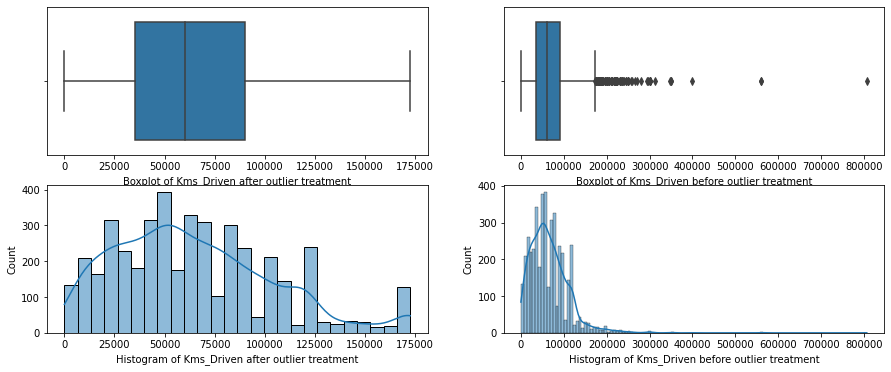

In [44]:
fig,axes = plt.subplots(nrows=2, ncols=2, figsize=(15,6))
sns.boxplot(x='Kms_Driven',data=car1,ax=axes[0,0])
axes[0,0].set_xlabel('Boxplot of Kms_Driven after outlier treatment')
sns.boxplot(x='Kms_Driven',data=final_dataset,ax=axes[0,1])
axes[0,1].set_xlabel('Boxplot of Kms_Driven before outlier treatment')
sns.histplot(x='Kms_Driven',data=car1,kde=True,ax=axes[1,0])
axes[1,0].set_xlabel('Histogram of Kms_Driven after outlier treatment')
sns.histplot(x='Kms_Driven',data=final_dataset,kde=True,ax=axes[1,1])
axes[1,1].set_xlabel('Histogram of Kms_Driven before outlier treatment')

In [45]:
outliers.clear()
outlier_detection('No_Year')

{'count': 4340.0, 'mean': 8.903225806451612, 'std': 4.2157573472895695, 'min': 0.0, '25%': 6.0, '50%': 8.0, '75%': 11.0, 'max': 30.0}
Q1 : 6.0
Q3 : 11.0
Inter quartile range is  5.0


(-1.5, 18.5)

In [46]:
car1.loc[((car1['No_Year']>= 18) & (car1['No_Year']<=30.0)), 'No_Year' ]=round(upper_lim)

Text(0.5, 0, 'Histogram of No_Year before outlier treatment')

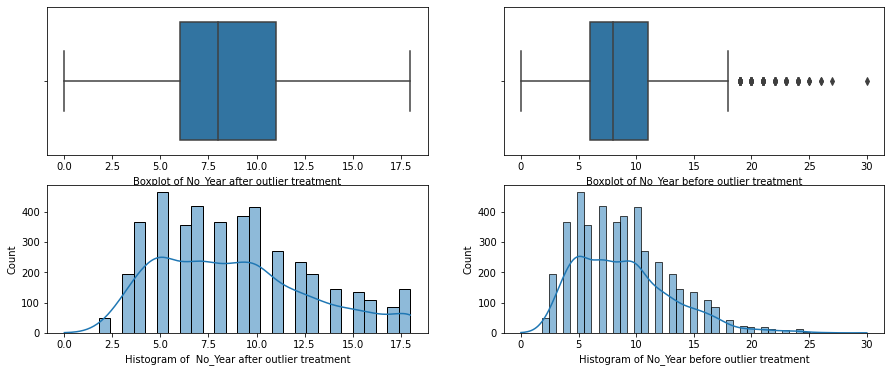

In [47]:
fig,axes = plt.subplots(nrows=2, ncols=2, figsize=(15,6))
sns.boxplot(x='No_Year',data=car1,ax=axes[0,0])
axes[0,0].set_xlabel('Boxplot of No_Year after outlier treatment')
sns.boxplot(x='No_Year',data=final_dataset,ax=axes[0,1])
axes[0,1].set_xlabel('Boxplot of No_Year before outlier treatment')
sns.histplot(x='No_Year',data=car1,kde=True,ax=axes[1,0])
axes[1,0].set_xlabel('Histogram of  No_Year after outlier treatment')
sns.histplot(x='No_Year',data=final_dataset,kde=True,ax=axes[1,1])
axes[1,1].set_xlabel('Histogram of No_Year before outlier treatment')

In [48]:
car1.head()

,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_Year
0,60000,70000,Petrol,Individual,Manual,First Owner,15
1,135000,50000,Petrol,Individual,Manual,First Owner,15
2,600000,100000,Diesel,Individual,Manual,First Owner,10
3,250000,46000,Petrol,Individual,Manual,First Owner,5
4,450000,141000,Diesel,Individual,Manual,Second Owner,8


# Separating Predictor and Target attribute

In [49]:
#independent and dependent features
X = car1.drop('Selling_Price', axis = 1)
y = car1['Selling_Price']

In [50]:
X.shape

(4340, 6)

In [51]:
y.shape

(4340,)

#Separating Categorical and Numeric Variables

In [52]:
X_num = X.drop(['Fuel_Type','Seller_Type','Transmission','Owner'],axis = 1)
X_cat = X[['Fuel_Type','Seller_Type','Transmission','Owner']]

In [53]:
X_num.shape

(4340, 2)

In [54]:
X_cat.shape

(4340, 4)

#Preprocessing on Numerical Data

In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [56]:
#### Normally we follow standard scaling to avoid the error of saturation which is caused for min-max scaling
### Min-Max scaling brings all the data in a prticular range for which we can't distinguish data with a very high value and
### a very low value. This problem can be avoided through standard scaling. Standard scaling doesn't bring the data in any
### particular range. Rather after this the values remain distinguishable and a curve like normal distribution can be found
### It is for doing the scaling operation on the numerical data
X_num_scaled = scaler.fit_transform(X_num)

In [57]:
X_num_scaled_df = pd.DataFrame(X_num_scaled, columns=X_num.columns)

#Preprocessing on Categorical Data

In [58]:
#dummy encoding on X set
X_cat_dummy=pd.get_dummies(X_cat,drop_first=True)

In [59]:
X_final = pd.concat([X_num_scaled_df, X_cat_dummy],axis=1,sort=False)

In [60]:
X_final.shape

(4340, 13)

In [61]:
y.shape

(4340,)

#Train-test Split

In [62]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_final,y, test_size = 0.20,random_state=0)

In [65]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3472, 13), (868, 13), (3472,), (868,))

# Model-OLS

In [67]:
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm

In [68]:
X_train_const = sm.add_constant(X_train)

In [69]:
ols_model = sm.OLS( y_train, X_train_const)

In [70]:
results = ols_model.fit()

In [71]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     218.5
Date:                Mon, 06 Jun 2022   Prob (F-statistic):               0.00
Time:                        18:15:42   Log-Likelihood:                -49903.
No. Observations:                3472   AIC:                         9.983e+04
Df Residuals:                    3458   BIC:                         9.992e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

Interpretation: After doing multiple regression we can understand from the adjusted R square value that, the model can describe 44.9% of the variability of the dependent variable(Selling_Price) . But after building the model we can see that all independent variables have p value lower than 0.05 except 'Fuel_Type_Electric', 'Fuel_Type_LPG', 'Fuel_Type_Petrol','Owner_Fourth & Above Owner', 'Owner_Second Owner','Owner_Test Drive Car','Owner_Third Owner'.
So at 95% confidence level we can say that, these independent variables can be identified as non-significant variables.So we are removing these independent variables and then building a new model

In [72]:
X_train_const.columns

Index(['const', 'Kms_Driven', 'No_Year', 'Fuel_Type_Diesel',
       'Fuel_Type_Electric', 'Fuel_Type_LPG', 'Fuel_Type_Petrol',
       'Seller_Type_Individual', 'Seller_Type_Trustmark Dealer',
       'Transmission_Manual', 'Owner_Fourth & Above Owner',
       'Owner_Second Owner', 'Owner_Test Drive Car', 'Owner_Third Owner'],
      dtype='object')

In [73]:
X_train_const = X_train_const.drop(['Fuel_Type_Electric', 'Fuel_Type_LPG', 'Fuel_Type_Petrol','Owner_Fourth & Above Owner',
       'Owner_Second Owner', 'Owner_Test Drive Car', 'Owner_Third Owner'], axis=1)

In [74]:
ols_model1 = sm.OLS(y_train, X_train_const).fit()

In [75]:
print(ols_model1.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     472.6
Date:                Mon, 06 Jun 2022   Prob (F-statistic):               0.00
Time:                        18:17:17   Log-Likelihood:                -49906.
No. Observations:                3472   AIC:                         9.983e+04
Df Residuals:                    3465   BIC:                         9.987e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

Here we can see that all independent variables have p-value lower than 0.05 i.e, all the independent variables are significant. But the Adjusted R square value is same as 44.9% as the previous one.

Looking at the attributes we can conclude that the Sales_Price depends mainly on Kms_driven, Fuel type,seller type,transmission type along with age of vehicle(No_Year).

# Predictive Analysis

# K-nn

In [76]:
from sklearn.neighbors import KNeighborsRegressor as KNR

In [77]:
model = KNR(n_neighbors = 3)    # Initially assigning the k value as 3 i.e. it will check for 3 nearest neighbours

In [78]:
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [79]:
y_train_pred_KNR = model.predict(X_train)

In [81]:
y_test_pred_KNR = model.predict(X_test)

In [82]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

In [83]:
#For train set
mae = mean_absolute_error(y_train, y_train_pred_KNR)
mse = mean_squared_error(y_train, y_train_pred_KNR)
rmse = np.sqrt(mean_squared_error(y_train, y_train_pred_KNR))
r2 = r2_score(y_train, y_train_pred_KNR)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 score:", r2)


MAE: 128904.22830261137
MSE: 69093757526.25916
RMSE: 262856.91454907396
R2 score: 0.7875817474490838


In [84]:
#For test set
#For train set
mae = mean_absolute_error(y_test, y_test_pred_KNR)
mse = mean_squared_error(y_test, y_test_pred_KNR)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_KNR))
r2 = r2_score(y_test, y_test_pred_KNR)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 score:", r2)

MAE: 178780.2741935484
MSE: 112105554768.54327
RMSE: 334821.6760733141
R2 score: 0.6981144696891677


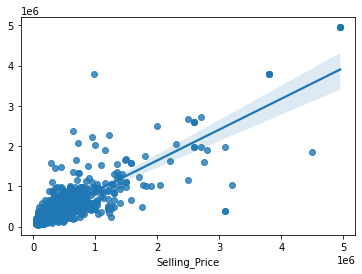

In [85]:
sns.regplot(y_test, y_test_pred_KNR)

# The KNN model can explain 69.81% variability of the dependent variable for test set and for train set it can explain 78.75% variability of the dependent variable

# Trying different value of K to check which value gives lowest RMSE

In [86]:
rmse_val_list = [] #to store rmse values for different k
r2_list = []

for K in range(30):
    K = K+1
    model = KNR(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    y_pred = model.predict(X_test) #make prediction on test set
    error = np.sqrt(mean_squared_error(y_test, y_pred)) #calculate rmse
    r2 = r2_score(y_test, y_pred)
    print('RMSE value for k= ' , K , 'is:', error)
    print('R2 score for value k= ', K ,'is:', r2)
    
    rmse_val_list.append(error) #store rmse values
    r2_list.append(r2)
    
print("The maximum R2 score we get is", max(r2_list))    
print("The minimum error we get is ", min(rmse_val_list))
print("The corresponding K value is ", 1+rmse_val_list.index(min(rmse_val_list)))

RMSE value for k=  1 is: 351137.7068186128
R2 score for value k=  1 is: 0.6679755222482319
RMSE value for k=  2 is: 334087.49722919264
R2 score for value k=  2 is: 0.6994369346766607
RMSE value for k=  3 is: 334821.6760733141
R2 score for value k=  3 is: 0.6981144696891677
RMSE value for k=  4 is: 333072.34405261587
R2 score for value k=  4 is: 0.7012607322762852
RMSE value for k=  5 is: 324124.4261940087
R2 score for value k=  5 is: 0.717096261214482
RMSE value for k=  6 is: 327187.64091711753
R2 score for value k=  6 is: 0.711723695571416
RMSE value for k=  7 is: 328429.51517376315
R2 score for value k=  7 is: 0.7095311779159652
RMSE value for k=  8 is: 331256.2163859974
R2 score for value k=  8 is: 0.7045096930160344
RMSE value for k=  9 is: 331958.7091716626
R2 score for value k=  9 is: 0.703255075561934
RMSE value for k=  10 is: 331775.814254732
R2 score for value k=  10 is: 0.7035819727676862
RMSE value for k=  11 is: 334276.4584915081
R2 score for value k=  11 is: 0.699096839112

# Hyper parameter tuning and Grid Search

In [87]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

params = {'n_neighbors': np.arange(3,50,2),'weights':['uniform', 'distance'],'p':[1,2]}# p=1--> manhattan distance,
                                                                                         # p=2--> euclidean distance
                                                                                         # Weight=uniform --> all points are
                                                                                         #        weighted equally
                                                                                         # Weight=distance --> Weight points by
                                                                                         #   the inverse of their distance

In [89]:
gserach = GridSearchCV(estimator=model,param_grid=params,cv=5)

gserach.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(n_neighbors=30),
             param_grid={'n_neighbors': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
       37, 39, 41, 43, 45, 47, 49]),
                         'p': [1, 2], 'weights': ['uniform', 'distance']})

In [90]:
gserach.best_params_

{'n_neighbors': 37, 'p': 1, 'weights': 'distance'}

In [92]:
model_best = KNR(n_neighbors = 37, p=1,weights='distance')

In [94]:
model_best.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=37, p=1, weights='distance')

In [95]:
y_train_pred_KNR = model_best.predict(X_train)

In [96]:
y_test_pred_KNR = model_best.predict(X_test)

In [97]:
#For train set
mae = mean_absolute_error(y_train, y_train_pred_KNR)
mse = mean_squared_error(y_train, y_train_pred_KNR)
rmse = np.sqrt(mean_squared_error(y_train, y_train_pred_KNR))
r2 = r2_score(y_train, y_train_pred_KNR)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 score:", r2)

MAE: 50504.666871794674
MSE: 12589347703.57145
RMSE: 112202.26247082297
R2 score: 0.9612959645604423


In [98]:
#For test set
#For train set
mae = mean_absolute_error(y_test, y_test_pred_KNR)
mse = mean_squared_error(y_test, y_test_pred_KNR)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_KNR))
r2 = r2_score(y_test, y_test_pred_KNR)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 score:", r2)

MAE: 141829.96707466958
MSE: 77965788571.28197
RMSE: 279223.5458754902
R2 score: 0.7900483746988417


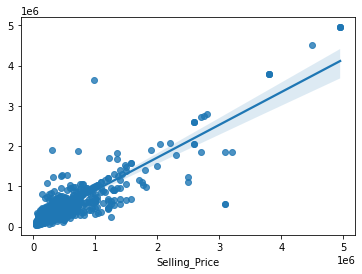

In [99]:
sns.regplot(y_test, y_test_pred_KNR)

# After Grid Search we got the k value as 37 as the best parameter applying which for the test set R2 score increase from 71.7% to 79%.

# 

# Decision Tree Regression

In [100]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()

In [101]:
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [102]:
y_pred_train_tree = tree_reg.predict(X_train)

In [103]:
y_pred_test_tree = tree_reg.predict(X_test)

In [104]:
#For train set
mae = mean_absolute_error(y_train, y_pred_train_tree)
mse = mean_squared_error(y_train, y_pred_train_tree)
rmse = np.sqrt(mean_squared_error(y_train, y_pred_train_tree))
r2 = r2_score(y_train, y_pred_train_tree)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 score:", r2)

MAE: 50504.666871794674
MSE: 12589347703.57145
RMSE: 112202.26247082297
R2 score: 0.9612959645604423


In [105]:
#For test set
mae = mean_absolute_error(y_test, y_pred_test_tree)
mse = mean_squared_error(y_test, y_pred_test_tree)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test_tree))
r2 = r2_score(y_test, y_pred_test_tree)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 score:", r2)

MAE: 183952.2997519921
MSE: 246333597307.8163
RMSE: 496320.05531493115
R2 score: 0.3366559863141433


The model has been overfitted as the rmse for the test set is higher than train set and r2 score is lower than train set

# Random Forest Regression

In [106]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()

In [107]:
forest_reg.fit(X_train, y_train)

RandomForestRegressor()

In [108]:
y_pred_train_forest = forest_reg.predict(X_train)

In [109]:
y_pred_test_forest = forest_reg.predict(X_test)

In [110]:
#For train set
mae = mean_absolute_error(y_train, y_pred_train_forest)
mse = mean_squared_error(y_train, y_pred_train_forest)
rmse = np.sqrt(mean_squared_error(y_train, y_pred_train_forest))
r2 = r2_score(y_train, y_pred_train_forest)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 score:", r2)

MAE: 88551.47354180853
MSE: 28265953438.80108
RMSE: 168124.81505952973
R2 score: 0.9131006236869694


In [111]:
#For test set
mae = mean_absolute_error(y_test, y_pred_test_forest)
mse = mean_squared_error(y_test, y_pred_test_forest)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test_forest))
r2 = r2_score(y_test, y_pred_test_forest)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 score:", r2)

MAE: 160420.60107975057
MSE: 99889045968.10754
RMSE: 316052.28359894437
R2 score: 0.7310119228562372


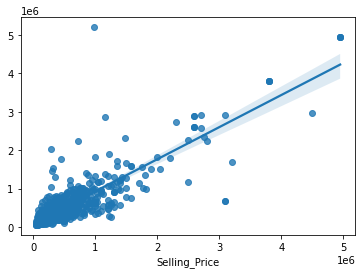

In [112]:
sns.regplot(y_test, y_pred_test_forest)

Random Forest also seems to be overfitting
 Will go for Hyperparameter tuning for this model to see the performance using the best parameter value for this model.

# Hyperparameter Tuning

In [113]:
from pprint import pprint
print('Parameters currently in use:\n')
pprint(forest_reg.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [114]:
param_grid = [{'n_estimators':[int(x) for x in np.linspace(start = 80, stop = 300, num = 20)], 
               'max_features':[2, 4, 6, 8, 10], 
               'bootstrap': [True, False]}]

forest_reg = RandomForestRegressor()
grid_search_forest = GridSearchCV(forest_reg, param_grid, cv=5, scoring = 'neg_mean_squared_error')

In [115]:
grid_search_forest.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'bootstrap': [True, False],
                          'max_features': [2, 4, 6, 8, 10],
                          'n_estimators': [80, 91, 103, 114, 126, 137, 149, 161,
                                           172, 184, 195, 207, 218, 230, 242,
                                           253, 265, 276, 288, 300]}],
             scoring='neg_mean_squared_error')

In [116]:
grid_search_forest.best_estimator_

RandomForestRegressor(max_features=2, n_estimators=184)

In [117]:
best_model_forest = grid_search_forest.best_estimator_

In [121]:
best_model_forest.fit(X_train, y_train)

RandomForestRegressor(max_features=2, n_estimators=184)

In [122]:
y_pred_train_best_model = best_model_forest.predict(X_train)

In [123]:
y_pred_test_best_model = best_model_forest.predict(X_test)

In [124]:
#For train set
mae = mean_absolute_error(y_train, y_pred_train_best_model)
mse = mean_squared_error(y_train, y_pred_train_best_model)
rmse = np.sqrt(mean_squared_error(y_train, y_pred_train_best_model))
r2 = r2_score(y_train, y_pred_train_best_model)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 score:", r2)

MAE: 86545.71262637735
MSE: 26363298342.4828
RMSE: 162367.7872685429
R2 score: 0.9189500475023324


In [125]:
#For test set
mae = mean_absolute_error(y_test, y_pred_test_best_model)
mse = mean_squared_error(y_test, y_pred_test_best_model)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test_best_model))
r2 = r2_score(y_test, y_pred_test_best_model)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 score:", r2)

MAE: 155176.2738506882
MSE: 88265450022.37682
RMSE: 297095.0185081817
R2 score: 0.7623127396038153


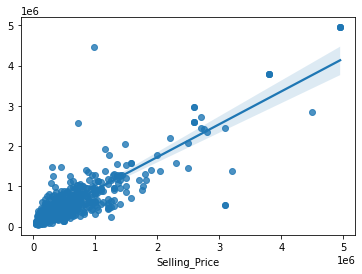

In [126]:
sns.regplot(y_test, y_pred_test_best_model)

#As we can see that after Hyper parameter tuning the RMSE has been reduced for test set and R2 score has been increased fom 73.1% to 76.23%

In [127]:
from sklearn.ensemble import RandomForestRegressor

rf_random = RandomForestRegressor()

In [128]:
n_estimators = [int(x) for x in np.linspace(100, 1200, 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5,30, 6)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]

In [129]:
random_grid = {'n_estimators':n_estimators ,
'max_features': max_features,
'max_depth':max_depth ,
'min_samples_split' :min_samples_split ,
'min_samples_leaf' :min_samples_leaf }

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [130]:
from sklearn.model_selection import RandomizedSearchCV
rf = RandomizedSearchCV(rf_random, param_distributions=random_grid, scoring='neg_mean_squared_error', n_iter=10, cv=5, n_jobs=-1, verbose=2, random_state=42)

In [131]:
rf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [132]:
y_train_pred_rf = model.predict(X_train)

In [133]:
y_test_pred_rf = rf.predict(X_test)

In [134]:
#For train set
mae = mean_absolute_error(y_train, y_train_pred_rf)
mse = mean_squared_error(y_train, y_train_pred_rf)
rmse = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
r2 = r2_score(y_train, y_train_pred_rf)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 score:", r2)

MAE: 167079.69361559142
MSE: 125139985853.81067
RMSE: 353751.30509131786
R2 score: 0.6152761396829473


In [135]:
#For test set
mae = mean_absolute_error(y_test, y_test_pred_rf)
mse = mean_squared_error(y_test, y_test_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))
r2 = r2_score(y_test, y_test_pred_rf)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 score:", r2)

MAE: 174253.5300078656
MSE: 104596661181.95322
RMSE: 323414.07078535284
R2 score: 0.7183349335824647


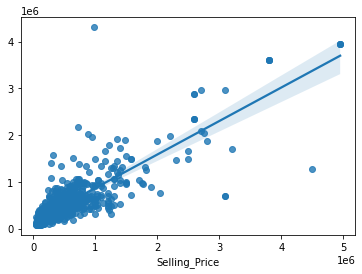

In [136]:
sns.regplot(y_test, y_test_pred_rf)